In [21]:
!pip install requests
!pip install -Uqq fastbook



     |████████████████████████████████| 727kB 7.8MB/s 
     |████████████████████████████████| 1.2MB 15.8MB/s 
     |████████████████████████████████| 194kB 40.5MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 


In [71]:
import requests
import fastbook
from fastbook import *

def isearch_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass


In [72]:
imgs = isearch_images_ddg('audi a4')
print(imgs[0])


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): duckduckgo.com:443
DEBUG:urllib3.connectionpool:https://duckduckgo.com:443 "POST / HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): duckduckgo.com:443
DEBUG:urllib3.connectionpool:https://duckduckgo.com:443 "GET /i.js?l=us-en&o=json&q=audi+a4&vqd=3-210197131272520080833058989502778205517-48423183073639392108151138318006138892&f=%2C%2C%2C&p=1&v7exp=a HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): duckduckgo.com:443
DEBUG:urllib3.connectionpool:https://duckduckgo.com:443 "GET /i.js?q=audi%20a4&o=json&p=1&s=100&u=bing&f=,,,&l=us-en&l=us-en&o=json&q=audi+a4&vqd=3-210197131272520080833058989502778205517-48423183073639392108151138318006138892&f=%2C%2C%2C&p=1&v7exp=a HTTP/1.1" 200 None


https://cdn.carbuzz.com/gallery-images/2021-audi-a4-sedan-view-out-back-carbuzz-692470.jpg


DEBUG:urllib3.util.retry:Converted retries value: 5 -> Retry(total=5, connect=None, read=None, redirect=None, status=None)
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): cdn.carbuzz.com:443
DEBUG:urllib3.connectionpool:https://cdn.carbuzz.com:443 "GET /gallery-images/2021-audi-a4-sedan-view-out-back-carbuzz-692470.jpg HTTP/1.1" 200 75645


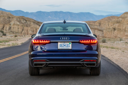

In [73]:
dest = 'a4.jpg'
download_url(imgs[0], dest, overwrite=True)
im = Image.open(dest)
im.to_thumb(128, 128)